# Renewable Power Generation
The following dataset (*TERNA_SUNSET_RENEWABLE_GENERATION*) make reference to the hourly production from renewable energy sources: water, geothermal, biomass, wind and solar power.
In this case historical data (up to D-1) can be downloaded here in the Download centre and is refreshed at midnight of day D

In [1]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_RENEWABLE_GENERATION" 
ren_energy = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
ren_energy = ren_energy.sort_values(by='ORAINI')

ren_energy

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,RENEWABLE_GENERATION_GWh,ENERGY_SOURCE,LOADTIME
253801,201901010000,20190101,1,5.104,Wind,2024-10-15 15:20:44.963
253800,201901010000,20190101,1,2.075,Hydro,2024-10-15 15:20:44.963
253799,201901010000,20190101,1,1.432,Biomass,2024-10-15 15:20:44.963
253798,201901010000,20190101,1,0.670,Geothermal,2024-10-15 15:20:44.963
253797,201901010000,20190101,1,0.000,Photovoltaic,2024-10-15 15:20:44.963
...,...,...,...,...,...,...
246824,202410152300,20241015,24,1.996,Biomass,2024-10-16 08:00:30.270
246823,202410152300,20241015,24,0.000,Photovoltaic,2024-10-16 08:00:30.270
246822,202410152300,20241015,24,0.590,Geothermal,2024-10-16 08:00:30.270
246821,202410152300,20241015,24,0.295,Wind,2024-10-16 08:00:30.270


In [2]:
# Filter the DataFrame for the relevant columns and rows
ren_energy = ren_energy[['RENEWABLE_GENERATION_GWh', 'ORAINI', 'ENERGY_SOURCE']]
# Convert ORAINI to datetime using the correct method
ren_energy['ORAINI'] = pd.to_datetime(ren_energy['ORAINI'], format='%Y%m%d%H%M')
ren_energy.set_index('ORAINI', inplace=True)

ren_energy

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_8868\4254947771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren_energy['ORAINI'] = pd.to_datetime(ren_energy['ORAINI'], format='%Y%m%d%H%M')


,RENEWABLE_GENERATION_GWh,ENERGY_SOURCE
ORAINI,,
2019-01-01 00:00:00,5.104,Wind
2019-01-01 00:00:00,2.075,Hydro
2019-01-01 00:00:00,1.432,Biomass
2019-01-01 00:00:00,0.670,Geothermal
2019-01-01 00:00:00,0.000,Photovoltaic
...,...,...
2024-10-15 23:00:00,1.996,Biomass
2024-10-15 23:00:00,0.000,Photovoltaic
2024-10-15 23:00:00,0.590,Geothermal


In [3]:
# Get unique labels of the ENERGY_SOURCE
unique_energy_sources = ren_energy['ENERGY_SOURCE'].unique()

# Convert to list if needed
energy_sources_list = unique_energy_sources.tolist()

# Display the unique energy sources
print(energy_sources_list)

['Wind', 'Hydro', 'Biomass', 'Geothermal', 'Photovoltaic']


In [4]:
wind = utils.filter_and_rename_energy_source(ren_energy, 'Wind', 'WIND_GWH')
photovoltaic = utils.filter_and_rename_energy_source(ren_energy, 'Photovoltaic', 'PHOTOVOLTAIC_GWH')
hydro = utils.filter_and_rename_energy_source(ren_energy, 'Hydro', 'HYDRO_GWH')
biomass = utils.filter_and_rename_energy_source(ren_energy, 'Biomass', 'BIOMASS_GWH')
geothermal = utils.filter_and_rename_energy_source(ren_energy, 'Geothermal', 'WIND_GWH')

### Wind production

In [5]:
wind

,WIND_GWH
ORAINI,
2019-01-01 00:00:00,5.104
2019-01-01 01:00:00,5.029
2019-01-01 02:00:00,5.061
2019-01-01 03:00:00,5.116
2019-01-01 04:00:00,5.213
...,...
2024-10-15 19:00:00,0.301
2024-10-15 20:00:00,0.233
2024-10-15 21:00:00,0.244


In [6]:
print("Macro-scale descriptive stats: WIND")
print(wind["WIND_GWH"].describe(),"\n")

Macro-scale descriptive stats: WIND
count    50780.000000
mean         2.368874
std          1.731814
min          0.022000
25%          0.950000
50%          1.933000
75%          3.478000
max          8.789000
Name: WIND_GWH, dtype: float64 



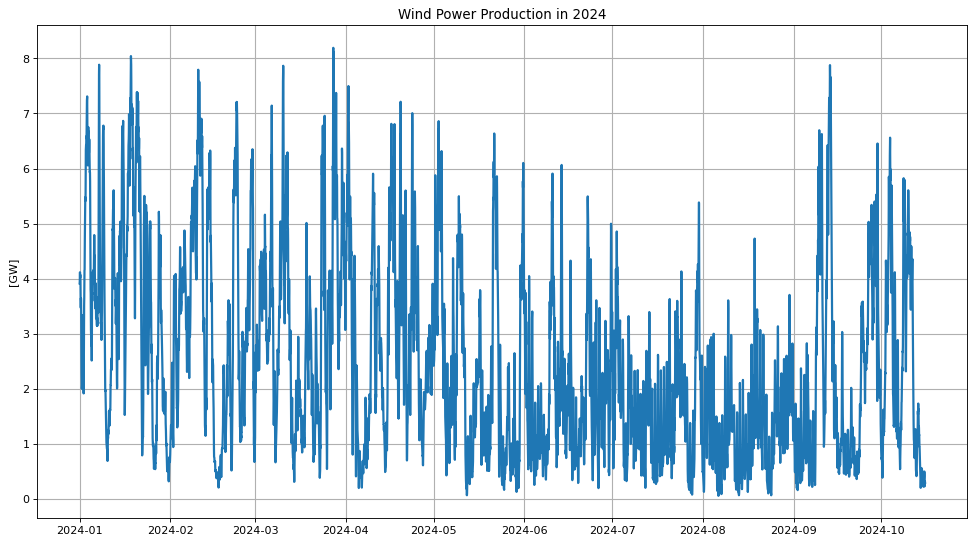

In [7]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"].loc["2024"], linewidth=2) 

ax.set_title("Wind Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

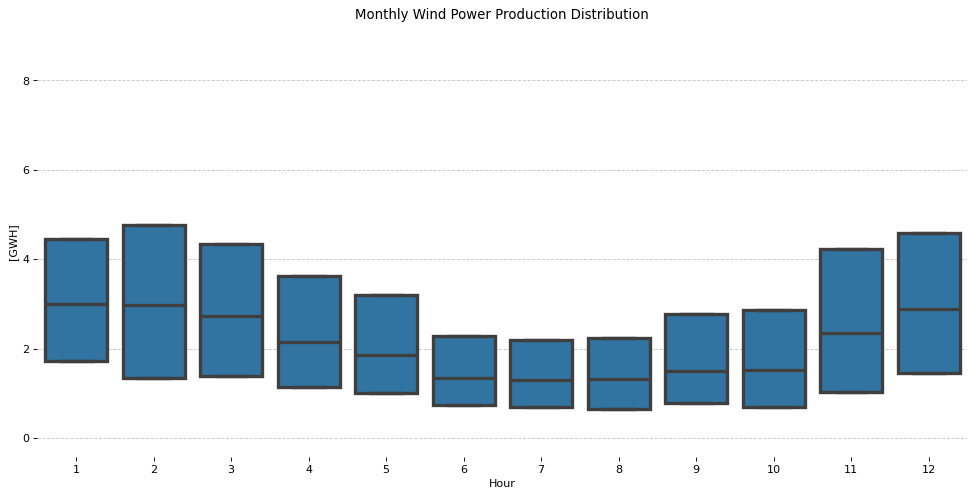

In [13]:
import seaborn as sns

wind_copy = wind.copy()
wind_copy.loc[:, 'hour'] = wind_copy.index.hour
wind_copy.loc[:, 'month'] = wind_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=wind_copy, x='month', y='WIND_GWH', fliersize=0, whis=0, linewidth=3, ax=ax)
ax.set_xlabel("Hour"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Wind Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5>Trends in wind</h5>

I use a rolling window of six months

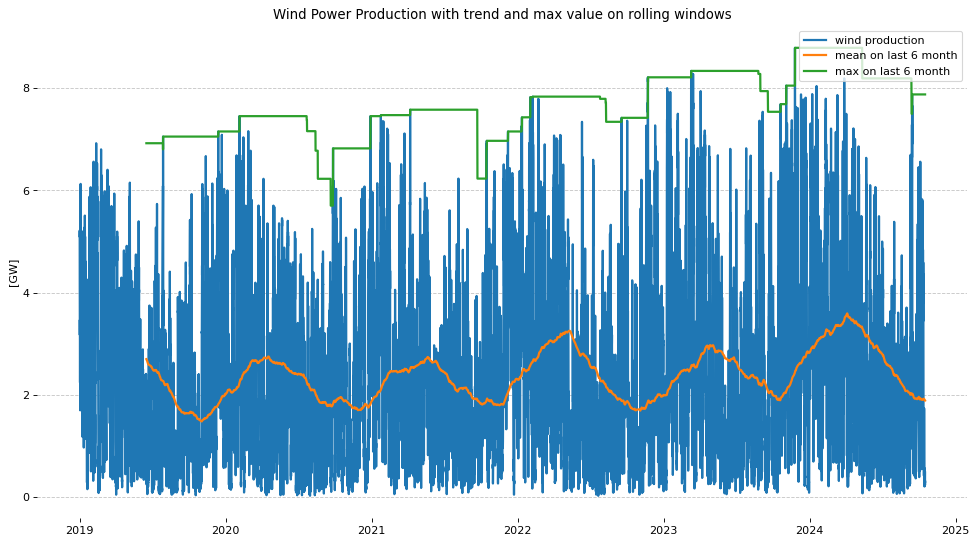

In [21]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"], linewidth=2, label = 'wind production') 
ax.plot(wind["WIND_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(wind["WIND_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Wind Power Production with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Hydro